In [7]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from astroNN.models import Galaxy10CNN

In [5]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [8]:
model = Galaxy10CNN()

AttributeError: module 'tensorflow.keras' has no attribute '__version__'

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 86s 193ms/step - accuracy: 0.1654 - loss: 3.7697 - val_accuracy: 0.2585 - val_loss: 1.9429
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.2342 - loss: nan - val_accuracy: 0.0575 - val_loss: nan
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.0611 - loss: nan - val_accuracy: 0.0575 - val_loss: nan
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.0595 - loss: nan - val_accuracy: 0.0575 - val_loss: nan
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.0633 - loss: nan - val_accuracy: 0.0575 - val_loss: nan


In [ ]:
eval = model.evaluate(test_images, test_labels)
print(f'Cifar10 CNN Test Accuracy: {eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.0573 - loss: nan
Shallow CNN Test Accuracy: 0.05749718099832535


111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step


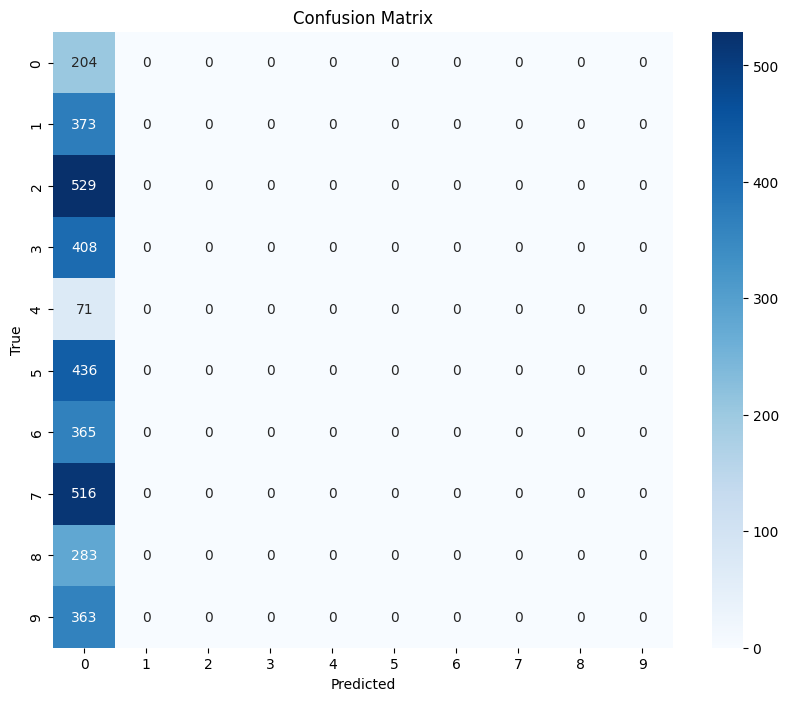

In [ ]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]

# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()